# WeatherPy
----

## Analysis:

* The temperature of a city is strongly negatively correlated with the absolute value of its latitude.
* Cloudiness, Humidity, and Windspeed have no correlation with latitude, although low humidity was rarely found near equator and poles.
* This code strongly weighted information from *coastal* cities over inland cities, introducing possible bias.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import random
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
cities = []
count = 0
while count < 500 :
    lat_lngs = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
    lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

    # Print the city count to confirm sufficient count
    
    count = len(cities)
    
count

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Building the url components that will be statis throughout the search
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "units": "imperial",
    "appid": weather_api_key,
}

In [5]:
def convert_temp (temp, scale='C', to='F'):
    '''
    Takes a temperature and converts it to a different scale
    temp must be numeric
    valid values form the starting scale and to scale are 'C': Celsius, 'F': Farenheit, and 'K': Kelvin
    '''
    scales = ['C','F','K']
    #print(scale.upper(),'\n',to,'\n',scales)
    if not ((scale.upper() in scales) and (to.upper() in scales)):
        return ValueError("valid values form the starting scale and to scale are 'C': Celsius, 'F': Farenheit, and 'K': Kelvin")
    
    if scale == 'C' and to == 'F':
        return 32.0 + ((9.0 / 5) * temp)
    
    if scale == 'F' and to == 'C':
        return (-32.0 + temp) * (5.0 / 9)
    
    if scale == 'K' and to == 'C':
        return temp - 273.15
    
    if scale == 'C' and to == 'K':
        return temp + 273.15
    
    if scale == 'K' and to == 'F':
        return 32.0 + ((9.0 / 5) * (temp - 273.15))
    
    if scale == 'F' and to == 'K':
        return ((-32.0 + temp) * (5.0 / 9)) + 273.15
    
    
#convert_temp(0)

#Note: this function is not used

In [6]:
#figuring out which data to extract for each city
params["q"] = np.random.choice(cities)

response = requests.get(base_url, params=params)

'''
{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 16.93,
  'feels_like': 17.09,
  'temp_min': 15,
  'temp_max': 20,
  'pressure': 1013,
  'humidity': 77},
 'visibility': 14484,
 'wind': {'speed': 1.05, 'deg': 257},
 'clouds': {'all': 90},
 'dt': 1594289893,
 'sys': {'type': 1,
  'id': 5771,
  'country': 'US',
  'sunrise': 1594298899,
  'sunset': 1594349950},
 'timezone': -25200,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}
'''

'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''

response.json()

{'coord': {'lon': -60.98, 'lat': 13.75},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 86,
  'feels_like': 87.06,
  'temp_min': 86,
  'temp_max': 86,
  'pressure': 1012,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 18.34, 'deg': 80},
 'clouds': {'all': 20},
 'dt': 1594503527,
 'sys': {'type': 1,
  'id': 8798,
  'country': 'LC',
  'sunrise': 1594460571,
  'sunset': 1594506942},
 'timezone': -14400,
 'id': 3576663,
 'name': 'Laborie',
 'cod': 200}

In [7]:
data = []
'''
here, I query open weather maps for each city, extracting the following:
name, latitude, longitude, daily high, humidity, cloud coverage %, wind speed
'''
print('Beginning Data Retrieval')     
print('-----------------------------')
j = 1
for i in range(len(cities)):
    params['q'] = cities[i]
    try:
        response = requests.get(base_url, params=params)
        r = response.json()
        city = r['name']
        lat = r['coord']['lat']
        lng = r['coord']['lon']
        max_temp = r['main']['temp_max']
        humid = r['main']['humidity']
        cloud = r['clouds']['all']
        wind = r['wind']['speed']
        country = r['sys']['country']
        today = date.today()

        r_data = [city,lat,lng,max_temp,humid,cloud,wind,country,today]
        
        data.append(r_data)
        print(f'Processing Record {i%50+1} of Set {j} | {cities[i]}')
        
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        
    if (i + 1) % 50 == 0:
        j += 1
        time.sleep(10)
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | asau
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | salalah
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | menongue
City not found. Skipping...
Processing Record 7 of Set 1 | terney
Processing Record 8 of Set 1 | huarmey
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | okhotsk
Processing Record 20 of Set 1 | san policarpo
Processing Record 21 of Set 1 | lata
Processing Record 22 of Set 1 | chuy
City not found. Skipping...
Processing Record 24 of Set 

Processing Record 3 of Set 5 | yar-sale
Processing Record 4 of Set 5 | lima
Processing Record 5 of Set 5 | cap malheureux
Processing Record 6 of Set 5 | forbes
Processing Record 7 of Set 5 | egvekinot
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of Set 5 | bargi
Processing Record 10 of Set 5 | lianzhou
Processing Record 11 of Set 5 | abu samrah
Processing Record 12 of Set 5 | muroto
Processing Record 13 of Set 5 | hithadhoo
Processing Record 14 of Set 5 | komsomolskiy
Processing Record 15 of Set 5 | zhigansk
Processing Record 16 of Set 5 | porto santo
Processing Record 17 of Set 5 | sorsk
Processing Record 18 of Set 5 | druskininkai
Processing Record 19 of Set 5 | kuusamo
Processing Record 20 of Set 5 | alappuzha
Processing Record 21 of Set 5 | caravelas
Processing Record 22 of Set 5 | airai
Processing Record 23 of Set 5 | biak
Processing Record 24 of Set 5 | kirksville
Processing Record 25 of Set 5 | narsaq
Processing Record 26 of Set 5 | port macquarie
Processing Record

Processing Record 9 of Set 9 | henties bay
Processing Record 10 of Set 9 | dinar
Processing Record 11 of Set 9 | gurupa
Processing Record 12 of Set 9 | havre-saint-pierre
Processing Record 13 of Set 9 | crossville
Processing Record 14 of Set 9 | santa cruz
Processing Record 15 of Set 9 | saldanha
Processing Record 16 of Set 9 | comodoro rivadavia
Processing Record 17 of Set 9 | tilichiki
Processing Record 18 of Set 9 | alihe
Processing Record 19 of Set 9 | port lincoln
Processing Record 20 of Set 9 | cedar city
Processing Record 21 of Set 9 | corinto
Processing Record 22 of Set 9 | biltine
Processing Record 23 of Set 9 | faya
Processing Record 24 of Set 9 | mutoko
Processing Record 25 of Set 9 | renfrew
Processing Record 26 of Set 9 | chibuto
Processing Record 27 of Set 9 | camacha
Processing Record 28 of Set 9 | krasnoselkup
Processing Record 29 of Set 9 | mabaruma
Processing Record 30 of Set 9 | noumea
Processing Record 31 of Set 9 | necochea
Processing Record 32 of Set 9 | turangi
P

Processing Record 13 of Set 13 | kapit
Processing Record 14 of Set 13 | kwinana
City not found. Skipping...
Processing Record 16 of Set 13 | beringovskiy
Processing Record 17 of Set 13 | daugavpils


In [8]:
data[0:5]

[['Asău', 46.43, 26.4, 61, 87, 0, 4.16, 'RO', datetime.date(2020, 7, 11)],
 ['Mataura',
  -46.19,
  168.86,
  44.15,
  93,
  69,
  3.31,
  'NZ',
  datetime.date(2020, 7, 11)],
 ['Salalah',
  17.02,
  54.09,
  80.6,
  94,
  90,
  3.36,
  'OM',
  datetime.date(2020, 7, 11)],
 ['Cape Town',
  -33.93,
  18.42,
  54,
  81,
  20,
  9.17,
  'ZA',
  datetime.date(2020, 7, 11)],
 ['Menongue',
  -14.66,
  17.69,
  55.45,
  37,
  0,
  4.43,
  'AO',
  datetime.date(2020, 7, 11)]]

In [9]:
for i in range(len(data)):
    data[i][8] = data[i][8].isoformat()

In [10]:
'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''
weather_df = pd.DataFrame(data, columns=['City Name', 'Latitude', 'Longitude', 'Daily High', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

In [11]:
weather_df.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asău,46.43,26.40,61.00,87,0,4.16,RO,2020-07-11
1,Mataura,-46.19,168.86,44.15,93,69,3.31,NZ,2020-07-11
2,Salalah,17.02,54.09,80.60,94,90,3.36,OM,2020-07-11
3,Cape Town,-33.93,18.42,54.00,81,20,9.17,ZA,2020-07-11
4,Menongue,-14.66,17.69,55.45,37,0,4.43,AO,2020-07-11


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df.to_csv(output_data_file, index=False)

In [13]:
# weather_df = pd.read_csv(output_data_file)
# weather_df.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
sweaty_df = weather_df.loc[weather_df['Humidity'] > 100]
sweaty_df.index

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(sweaty_df.index)
clean_city_data.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asău,46.43,26.40,61.00,87,0,4.16,RO,2020-07-11
1,Mataura,-46.19,168.86,44.15,93,69,3.31,NZ,2020-07-11
2,Salalah,17.02,54.09,80.60,94,90,3.36,OM,2020-07-11
3,Cape Town,-33.93,18.42,54.00,81,20,9.17,ZA,2020-07-11
4,Menongue,-14.66,17.69,55.45,37,0,4.43,AO,2020-07-11


In [16]:
# Extract relevant fields from the data frame
##Which fields?

# Export the City_Data into a csv
## a second csv?
output_data_file = 'output_data/clean_cities.csv'
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
clean_city_data.head()

,City Name,Latitude,Longitude,Daily High,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asău,46.43,26.40,61.00,87,0,4.16,RO,2020-07-11
1,Mataura,-46.19,168.86,44.15,93,69,3.31,NZ,2020-07-11
2,Salalah,17.02,54.09,80.60,94,90,3.36,OM,2020-07-11
3,Cape Town,-33.93,18.42,54.00,81,20,9.17,ZA,2020-07-11
4,Menongue,-14.66,17.69,55.45,37,0,4.43,AO,2020-07-11


## Latitude vs. Temperature Plot

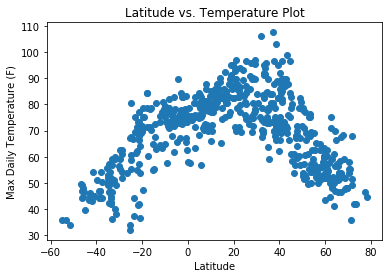

In [18]:
#linRegPlot(clean_city_data,clean_city_data,'','')
plt.scatter(clean_city_data['Latitude'], clean_city_data['Daily High'])
plt.xlabel('Latitude')
plt.ylabel('Max Daily Temperature (F)')
plt.title('Latitude vs. Temperature Plot')
plt.savefig("output_data/Latitude vs Temperature Plot.png")

* As we can see, the temperatures of the earth are highest around the equator and lowest near the poles. There appears to be a relationship, but it's not linear

## Latitude vs. Humidity Plot

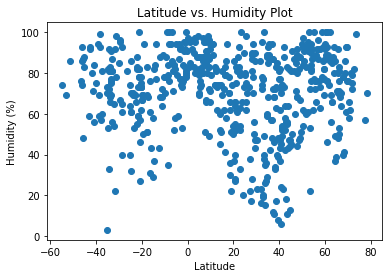

In [19]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity Plot')
plt.savefig("output_data/Latitude vs Humidity Plot.png")

* The humidity appears to be the Lowest near the equator and the poles, but there is no clear linear relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

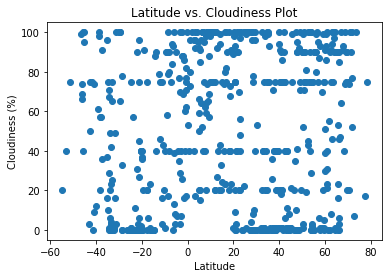

In [20]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness Plot')
plt.savefig("output_data/Latitude vs Cloudiness Plot.png")

* There appears to be no linear correlation between latitude and cloudiness, however the data appears to be 'snapped' to 10% increments because it is based on human judgement

## Latitude vs. Wind Speed Plot

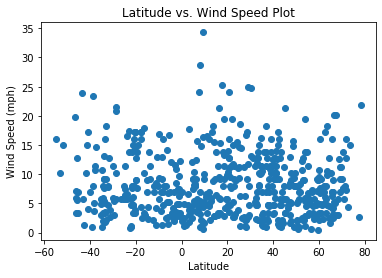

In [21]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed Plot')
plt.savefig("output_data/Latitude vs Wind Speed Plot.png")

* There appears to be no clear linear correlation between latitude and windspeed, but the highest wind speeds are near the equator

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def linRegPlot(x_values, y_values, x_label = "", y_label = "",title = ""):
    '''
    Takes the x values and y values for a scatter plot,
    runs a linear regression comparing the two values,
    and then displays a scatter plot with the regression line
    '''
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    #plt.show()
    print('The r-squared-value of the relationship is', round(rvalue**2,4))
    plt.savefig("output_data/" + title + ".png", format='png')
    #return plt.figure()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data.loc[clean_city_data['Latitude'] >= 0]
southern_df = clean_city_data.loc[clean_city_data['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.4271


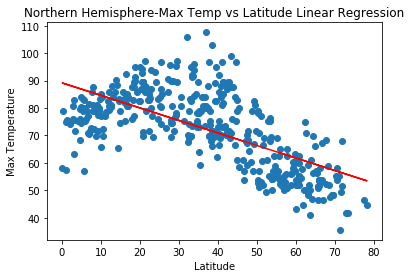

In [24]:
linRegPlot(northern_df['Latitude'], northern_df['Daily High'],'Latitude','Max Temperature','Northern Hemisphere-Max Temp vs Latitude Linear Regression')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.6275


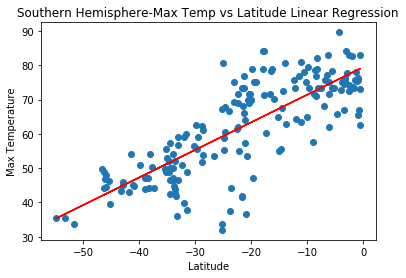

In [25]:
t = 'Southern Hemisphere-Max Temp vs Latitude Linear Regression'
linRegPlot(southern_df['Latitude'], southern_df['Daily High'],'Latitude','Max Temperature',t)

* There is a strong linear correlation between the latitude and the daily high on each side of the equator
* It is strongly negative in the northern hemisphere, and strongly positive in the southern hemisphere.
* This matches our earlier observation that temperature goes down as we go away from the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.0001


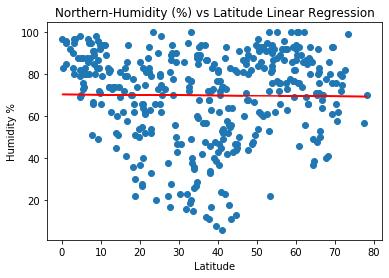

In [26]:
linRegPlot(northern_df['Latitude'], northern_df['Humidity'],'Latitude','Humidity %','Northern-Humidity (%) vs Latitude Linear Regression')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.0137


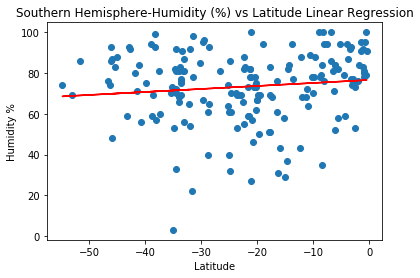

In [27]:
linRegPlot(southern_df['Latitude'], southern_df['Humidity'],'Latitude','Humidity %','Southern Hemisphere-Humidity (%) vs Latitude Linear Regression')

* The correlation betweeen latitude and humidity is extremely weak
* It would be helpful to analyze the data to see if the lack of low humidity at the poles and equator is significant

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.0127


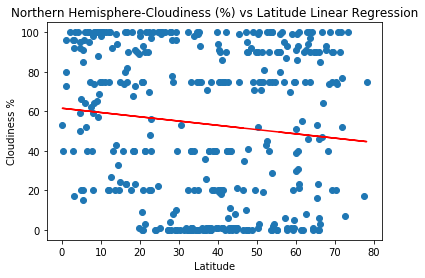

In [28]:
linRegPlot(northern_df['Latitude'], northern_df['Cloudiness'],'Latitude','Cloudiness %','Northern Hemisphere-Cloudiness (%) vs Latitude Linear Regression')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.003


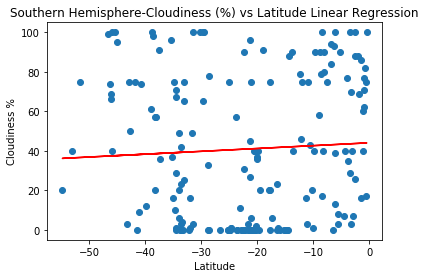

In [29]:
linRegPlot(southern_df['Latitude'], southern_df['Cloudiness'],'Latitude','Cloudiness %','Southern Hemisphere-Cloudiness (%) vs Latitude Linear Regression')

* There regression shows that there is no relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.0027


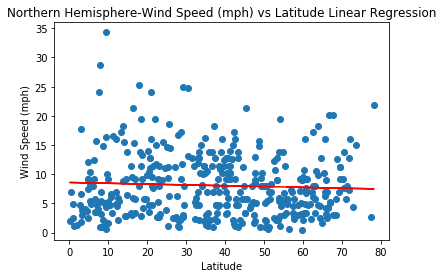

In [30]:
linRegPlot(northern_df['Latitude'], northern_df['Wind Speed'],'Latitude','Wind Speed (mph)','Northern Hemisphere-Wind Speed (mph) vs Latitude Linear Regression')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared-value of the relationship is 0.025


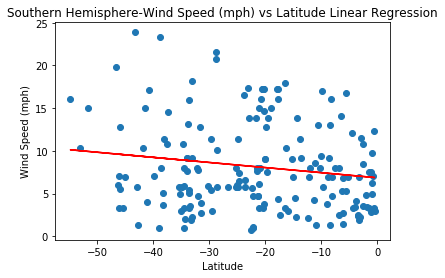

In [31]:
linRegPlot(southern_df['Latitude'], southern_df['Wind Speed'],'Latitude','Wind Speed (mph)','Southern Hemisphere-Wind Speed (mph) vs Latitude Linear Regression')

* There regression shows that there is no relationship between latitude and wind speed.